# Question 1: Linear Models with Materials Data
**1.1 Loading and examing our data**

You are provided with a dataset containing fictional materials science-related data. The data is in the HW1 folder named `AutoAM_dataset.csv` The dataset includes features such as temperature, pressure, and composition, and the target variable is a property of interest (e.g., conductivity).

a) Load the dataset and explore its structure. Heads up though! I poisoned the dataset a with things like outliers, missing cells, duplicate entries, nonsense values etc. Identify problematic data. 

I suggest using both descriptive statistics as well as some plotting to visualize the data. If you are really feeling brave you could check out and use the amazing `ydata-profiling` package (https://docs.profiling.ydata.ai/latest/). 

In [2]:
#your code goes here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('AutoAM_dataset.csv')
df

,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction,Score
0,0.0,1.000000,0.000000,0.000000,0.339554
1,2.5,3.000000,0.100000,NaN,0.000000
2,5.0,5.000000,-0.100000,-0.100000,0.218576
3,0.0,0.999931,0.000006,0.000025,0.368919
4,0.0,5.070133,0.225151,1.000000,0.000000
...,...,...,...,...,...
97,0.0,1.585934,-0.337143,-0.372811,0.922120
98,0.0,1.568030,-0.335316,-0.365804,0.901296
99,0.0,3.410189,-0.182025,-0.226603,0.595148
100,0.0,1.558826,-0.349834,-0.328645,0.936549


In [3]:
#OPTIONAL your ydata-profiling code goes here

b) Deal with the identified problematic data and deal with them however you see fit. Once you have done so, plot the data. The data set has 4 features and a score. Use scatter plots where you encode information as x, y, and color. Plot histograms or violin plots of some of the features.

In [4]:
#your data cleaning code goes here
df.dropna(inplace=True)
#plot each variable vs prime delay to check for outliers/visualize the data
# get rid of the score outliers 
df = df[df['Score'] < 10000]
df = df[df['Score'] >= 0]

# get rid of any duplicate data in the entries
df.drop_duplicates(inplace=True)

#rename the columns to get rid of the space
df.rename(columns={'Prime Delay':'Prime_Delay'}, inplace=True)
df.rename(columns={'Print Speed':'Print_Speed'}, inplace=True)
df.rename(columns={'X Offset Correction':'X_Offset_Correction'}, inplace=True)
df.rename(columns={'Y Offset Correction':'Y_Offset_Correction'}, inplace=True)



<Axes: >

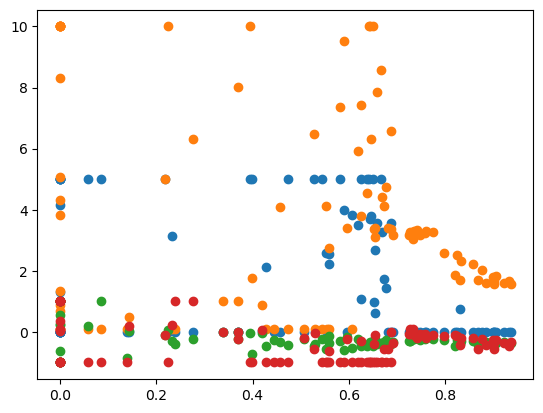

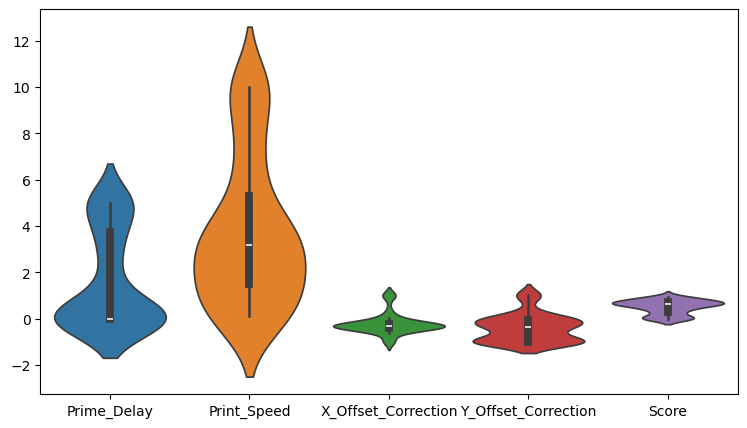

In [5]:
#your plotting code goes here
from seaborn import violinplot
fig1 = plt.figure('Figure 1')
plt.scatter(df['Score'], df['Prime_Delay'])
plt.scatter(df['Score'], df['Print_Speed'])
plt.scatter(df['Score'], df['X_Offset_Correction'])
plt.scatter(df['Score'], df['Y_Offset_Correction'])
fig2 = plt.figure('Figure 2', figsize=(9,5))

violinplot(data=df)


b) Split the dataset into training and testing sets (80% training, 20% testing).



In [6]:
#your code goes here
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)




**1.2 Linear Model Construction and Validation**

Build a linear regression model using the statsmodels package.

a) Train the linear model on the training set.

In [13]:
#your code goes here
import statsmodels.formula.api as smf

model = smf.ols(formula='Score ~ Prime_Delay*Print_Speed + X_Offset_Correction + Y_Offset_Correction', data=df_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     13.77
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.75e-09
Time:                        10:10:09   Log-Likelihood:                 9.3075
No. Observations:                  74   AIC:                            -6.615
Df Residuals:                      68   BIC:                             7.209
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

b) Validate the model on the testing set and calculate relevant evaluation metrics.



In [20]:
#your code goes here

pred = results.get_prediction(df_test).summary_frame(alpha=0.05)
print(pred)







        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   0.742176  0.064157       0.614152       0.870200      0.279929   
1   0.722625  0.052010       0.618840       0.826410      0.266496   
2   0.480464  0.065216       0.350328       0.610600      0.017627   
3   0.785992  0.090730       0.604942       0.967041      0.306344   
4   0.508953  0.050326       0.408529       0.609378      0.053576   
5   0.394807  0.086505       0.222190       0.567424     -0.081721   
6   0.489768  0.064431       0.361198       0.618337      0.027369   
7   0.713648  0.051011       0.611857       0.815440      0.257968   
8   0.512135  0.078730       0.355030       0.669239      0.041003   
9   0.502526  0.077709       0.347459       0.657593      0.032070   
10  0.578955  0.034342       0.510427       0.647483      0.129534   
11  0.572095  0.042926       0.486438       0.657752      0.119745   
12  0.588482  0.033359       0.521914       0.655049      0.139356   
13  0.543241  0.0358

c) Interpret the model coefficients and assess the model's performance.



**<span style="color:teal">put your discussion here</span>**
